# What us bootstrapping in statistics ?
It is a method used to estimate summary statistics such as the mean or standard deviation. It is used in applied machine learning to estimate the skill of machine learning models when making predictions on data not included in the training data. In other words the bootstrap method is a statistical technique for estimating quantities about a population by averaging estimates from multiple small data samples. Importantly, samples are constructed by drawing observations from a large data sample one at a time and returning them to the data sample after they have been chosen. This allows a given observation to be included in a given small sample more than once. This approach to sampling is called sampling with replacement.
The following is achieved in this code
* The bootstrap method involves iteratively resampling a dataset with replacement.
* That when using the bootstrap you must choose the size of the sample and the number of repeats.
* The scikit-learn provides a function that you can use to resample a dataset for the bootstrap method

# How is bootstrapping used in A/B testing ?

The bootstrap method is a resampling technique used to estimate statistics on a population by sampling a dataset with replacement.
Imagine we own a website and think changing the color of a ‘subscribe’ button will improve signups. One method to measure the improvement is to conduct an A/B test where we show 50% of people the old version and 50% of the people the new version. We can use the bootstrap to understand how much the button color improves responses and give us the error bars associated with the test - this will give us lower and upper bounds on how good we should expect the change to be!





# How is bootstrapping used for machine learning ?

The procedure of using the bootstrap method to estimate the skill of the model can be summarized as follows:

* Choose a number of bootstrap samples to perform
* Choose a sample size
* For each bootstrap sample
* Draw a sample with replacement with the chosen size
* Fit a model on the data sample
* Estimate the skill of the model on the out-of-bag sample.
* Calculate the mean of the sample of model skill estimates.


A useful feature of the bootstrap method is that the resulting sample of estimations often forms a Gaussian distribution(normal distribution). In additional to summarizing this distribution with a central tendency, measures of variance can be given, such as standard deviation and standard error. Further, a confidence interval can be calculated and used to bound the presented estimate. This is useful when presenting the estimated skill of a machine learning model.


bootstrap method is used to estimate statistics on a population by sampling a dataset with replacement.
 It is also non-parametric because it doesn't assume any model as well as parameters and just use the original sample set to estimate the statistics.

# Sampling with and without replacement¶

In [34]:
import numpy as np
from numpy.random import seed
from numpy.random import  randint
from numpy import mean

seed(123)
# with replacement
print('sample with replacement',np.random.choice(10,12))
# Probability weights can be given
print('sample with replacement and weights',np.random.choice(4,10,p =[0.1,0.4,0.4,0.1]))
# random sample mulidimentional array
x = randint(0,9,(8,10))
print('random multi dimentional sample',x)
np.random.shuffle(x)
print('random multi dimentional shuffle',x)

sample with replacement [2 2 6 1 3 9 6 1 0 1 9 0]
sample with replacement and weights [1 2 1 0 1 2 1 1 2 2]
random multi dimentional sample [[8 0 7 3 4 6 1 5 6 2]
 [1 8 3 5 0 2 6 2 4 4]
 [6 3 0 6 4 7 6 7 1 5]
 [7 2 4 8 1 2 1 1 3 5]
 [0 8 1 6 3 3 5 7 2 3]
 [3 3 8 6 7 6 3 6 6 6]
 [1 3 4 3 1 0 5 8 6 8]
 [1 0 3 1 3 4 7 6 1 4]]
random multi dimentional shuffle [[1 8 3 5 0 2 6 2 4 4]
 [8 0 7 3 4 6 1 5 6 2]
 [6 3 0 6 4 7 6 7 1 5]
 [3 3 8 6 7 6 3 6 6 6]
 [1 0 3 1 3 4 7 6 1 4]
 [7 2 4 8 1 2 1 1 3 5]
 [0 8 1 6 3 3 5 7 2 3]
 [1 3 4 3 1 0 5 8 6 8]]


# Standard Error
Estimate. Since the population standard deviation is seldom known, the standard error of the mean is usually estimated as the sample standard deviation divided by the square root of the sample size (assuming statistical independence of the values in the sample). n is the size (number of observations) of the sample.


The standard error (SE) of a statistic (usually an estimate of a parameter) is the standard deviation of its sampling distribution[1] or an estimate of that standard deviation. If the parameter or the statistic is the mean, it is called the standard error of the mean (SEM).

The sampling distribution of a population mean is generated by repeated sampling and recording of the means obtained. This forms a distribution of different means, and this distribution has its own mean and variance. Mathematically, the variance of the sampling distribution obtained is equal to the variance of the population divided by the sample size. This is because as the sample size increases, sample means cluster more closely around the population mean.

Therefore, the relationship between the standard error and the standard deviation is such that, for a given sample size, the standard error equals the standard deviation divided by the square root of the sample size. In other words, the standard error of the mean is a measure of the dispersion of sample means around the population mean.

In regression analysis, the term "standard error" refers either to the square root of the reduced chi-squared statistic or the standard error for a particular regression coefficient (as used in, e.g., confidence intervals).

# Bootstrapping 

In [42]:
data = randint(100,200,100)
print(data)
for i in range(10):

    bootstrap_sample  = np.random.choice(data,size =10)
    print('\n')
    print('bootstrap sample',i,' - ',bootstrap_sample )
    print('summary stats ', np.mean(bootstrap_sample),np.median(bootstrap_sample),np.std(bootstrap_sample))
    

[158 169 177 192 127 173 146 103 187 101 163 128 188 194 146 114 137 196
 148 171 139 115 133 105 186 152 120 198 128 198 101 196 125 143 195 117
 197 129 122 147 154 183 122 139 163 171 113 186 177 101 103 187 199 108
 115 195 131 126 114 167 199 124 114 111 170 199 123 169 140 159 130 120
 159 174 179 177 188 113 181 113 123 171 124 197 127 187 117 156 197 141
 166 111 135 168 182 175 190 116 142 191]


bootstrap sample 0  -  [147 115 111 101 173 137 177 114 159 187]
summary stats  142.1 142.0 29.504067516191732


bootstrap sample 1  -  [101 113 169 186 125 158 181 137 122 126]
summary stats  141.8 131.5 28.166646942793882


bootstrap sample 2  -  [148 108 124 197 158 117 114 105 197 181]
summary stats  144.9 136.0 34.69423583248376


bootstrap sample 3  -  [111 126 105 126 111 154 125 175 126 195]
summary stats  135.4 126.0 28.203545876361005


bootstrap sample 4  -  [182 146 170 128 195 197 198 141 163 167]
summary stats  168.7 168.5 23.460818400047344


bootstrap sample 5  -  [196

# Bootstrapping with montocarlo simulation

Monte Carlo simulation is a computerized mathematical technique that allows people to account for risk in quantitative analysis and decision making.
Monte Carlo simulation furnishes the decision-maker with a range of possible outcomes and the probabilities they will occur for any choice of action.. It shows the extreme possibilities—the outcomes of going for broke and for the most conservative decision—along with all possible consequences for middle-of-the-road decisions. One approach that can produce a better understanding of the range of potential outcomes and help avoid the “flaw of averages” is a Monte Carlo simulation.

Bootstrapping is a special case of montocarlo simulation

In [43]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set_style('whitegrid')

In [44]:
# Define the variables for the Percent to target based on historical results
avg = 1
std_dev = .1
num_reps = 500
num_simulations = 1000

In [45]:
# Show an example of calculating the percent to target
pct_to_target = np.random.normal(avg, std_dev, num_reps).round(2)


array([1.1 , 1.13, 0.72, 0.92, 1.01, 0.9 , 0.89, 0.99, 1.12, 0.93, 1.08,
       1.19, 0.88, 1.04, 1.05, 0.93, 0.97, 1.14, 0.97, 0.95, 1.19, 1.2 ,
       0.97, 0.99, 0.91, 1.05, 1.28, 1.1 , 0.89, 1.1 , 1.16, 0.8 , 0.87,
       0.86, 0.96, 0.95, 0.92, 0.97, 0.98, 1.09, 0.98, 1.16, 0.96, 0.85,
       1.17, 1.12, 0.85, 0.93, 1.09, 1.13, 1.13, 1.  , 1.04, 1.07, 1.08,
       0.85, 1.02, 1.  , 1.07, 1.04, 0.9 , 0.99, 1.07, 0.93, 1.03, 1.14,
       1.08, 0.8 , 1.05, 0.92, 0.94, 0.9 , 1.12, 0.97, 0.96, 0.88, 1.02,
       1.14, 0.86, 0.76, 1.16, 0.97, 0.93, 1.02, 1.02, 1.17, 1.14, 1.2 ,
       0.97, 1.05, 1.12, 0.88, 0.96, 1.03, 1.15, 0.89, 1.15, 1.12, 1.04,
       1.08, 1.18, 0.77, 0.85, 1.04, 1.12, 1.02, 0.93, 1.04, 0.86, 0.93,
       1.11, 0.94, 0.83, 0.97, 1.16, 1.03, 0.98, 1.05, 0.79, 1.12, 0.8 ,
       0.93, 1.11, 1.14, 0.96, 1.05, 1.02, 0.79, 0.95, 0.93, 1.11, 0.94,
       1.06, 0.86, 0.92, 1.02, 0.87, 1.15, 1.15, 1.01, 1.  , 0.94, 0.99,
       0.96, 0.97, 1.03, 1.01, 1.05, 0.91, 0.95, 1.

In [47]:
# Another example for the sales target distribution
sales_target_values = [75_000, 100_000, 200_000, 300_000, 400_000, 500_000]
sales_target_prob = [.3, .3, .2, .1, .05, .05]
sales_target = np.random.choice(sales_target_values, num_reps, p=sales_target_prob)

In [48]:
df = pd.DataFrame(index=range(num_reps), data={'Pct_To_Target': pct_to_target,
                                               'Sales_Target': sales_target})
df.head()

,Pct_To_Target,Sales_Target
0,1.10,200000
1,1.13,100000
2,0.72,400000
3,0.92,200000
4,1.01,200000


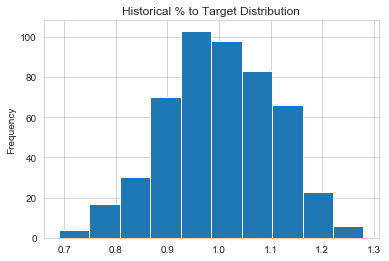

In [49]:
# Simple histogram to confirm distribution looks as expected
df['Pct_To_Target'].plot(kind='hist', title='Historical % to Target Distribution')

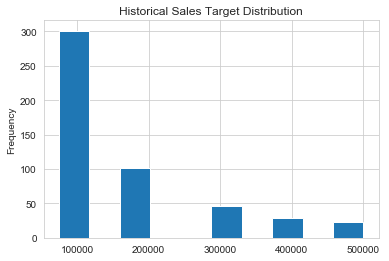

In [51]:

# Look at the sales target distribution
df['Sales_Target'].plot(kind='hist', title='Historical Sales Target Distribution')

In [52]:
# Back into the actual sales amount
df['Sales'] = df['Pct_To_Target'] * df['Sales_Target']

In [53]:
def calc_commission_rate(x):
    """ Return the commission rate based on the table:
    0-90% = 2%
    91-99% = 3%
    >= 100 = 4%
    """
    if x <= .90:
        return .02
    if x <= .99:
        return .03
    else:
        return .04

In [54]:
df['Commission_Rate'] = df['Pct_To_Target'].apply(calc_commission_rate)
df.head()

,Pct_To_Target,Sales_Target,Sales,Commission_Rate
0,1.10,200000,220000.0,0.04
1,1.13,100000,113000.0,0.04
2,0.72,400000,288000.0,0.02
3,0.92,200000,184000.0,0.03
4,1.01,200000,202000.0,0.04


In [56]:
# Calculate the commissions
df['Commission_Amount'] = df['Commission_Rate'] * df['Sales']

In [57]:
print(df['Sales'].sum(), df['Commission_Amount'].sum(), df['Sales_Target'].sum())

83564500.0 2839890.0 83225000


In [58]:
df.describe()


,Pct_To_Target,Sales_Target,Sales,Commission_Rate,Commission_Amount
count,500.000000,500.000000,500.00000,500.000000,500.000000
mean,1.001420,166450.000000,167129.00000,0.033280,5679.780000
std,0.107434,118706.908646,123251.05173,0.007679,4722.046129
min,0.690000,75000.000000,56250.00000,0.020000,1125.000000
25%,0.930000,75000.000000,80250.00000,0.030000,2902.500000
50%,1.000000,100000.000000,103000.00000,0.040000,3690.000000
75%,1.080000,200000.000000,216000.00000,0.040000,8210.000000
max,1.280000,500000.000000,615000.00000,0.040000,24600.000000


In [59]:
df.describe()

,Pct_To_Target,Sales_Target,Sales,Commission_Rate,Commission_Amount
count,500.000000,500.000000,500.00000,500.000000,500.000000
mean,1.001420,166450.000000,167129.00000,0.033280,5679.780000
std,0.107434,118706.908646,123251.05173,0.007679,4722.046129
min,0.690000,75000.000000,56250.00000,0.020000,1125.000000
25%,0.930000,75000.000000,80250.00000,0.030000,2902.500000
50%,1.000000,100000.000000,103000.00000,0.040000,3690.000000
75%,1.080000,200000.000000,216000.00000,0.040000,8210.000000
max,1.280000,500000.000000,615000.00000,0.040000,24600.000000


In [62]:
df1 = pd.DataFrame(index =range(num_reps),data={'Pct_To_Target': pct_to_target,
                                                   'Sales_Target': sales_target})
df1

,Pct_To_Target,Sales_Target
0,1.10,200000
1,1.13,100000
2,0.72,400000
3,0.92,200000
4,1.01,200000
...,...,...
495,0.96,75000
496,0.88,300000
497,1.07,100000
498,0.88,75000


In [63]:
# Define a list to keep all the results from each simulation that we want to analyze
all_stats = []

# Loop through many simulations
for i in range(num_simulations):
    
    # Choose random inputs for the sales targets and percent to target
    sales_target = np.random.choice(sales_target_values, num_reps, p=sales_target_prob)
    pct_to_target = np.random.normal(avg, std_dev, num_reps).round(2)
    
    # Build the dataframe based on the inputs and number of reps
    df = pd.DataFrame(index=range(num_reps), data={'Pct_To_Target': pct_to_target,
                                                   'Sales_Target': sales_target})
    
    # Back into the sales number using the percent to target rate
    df['Sales'] = df['Pct_To_Target'] * df['Sales_Target']
    
    # Determine the commissions rate and calculate it
    df['Commission_Rate'] = df['Pct_To_Target'].apply(calc_commission_rate)
    df['Commission_Amount'] = df['Commission_Rate'] * df['Sales']
    
    # We want to track sales,commission amounts and sales targets over all the simulations
    all_stats.append([df['Sales'].sum().round(0), 
                      df['Commission_Amount'].sum().round(0), 
                      df['Sales_Target'].sum().round(0)])

In [64]:

results_df = pd.DataFrame.from_records(all_stats, columns=['Sales', 'Commission_Amount', 'Sales_Target'])

In [65]:
results_df.describe().round(0).style.format('{:,}')

,Sales,Commission_Amount,Sales_Target
count,"1,000.0","1,000.0","1,000.0"
mean,"83,780,453.0","2,860,195.0","83,774,000.0"
std,"2,772,249.0","104,669.0","2,737,751.0"
min,"74,983,250.0","2,506,565.0","75,900,000.0"
25%,"81,875,375.0","2,788,322.0","81,975,000.0"
50%,"83,794,750.0","2,859,548.0","83,750,000.0"
75%,"85,531,000.0","2,928,246.0","85,675,000.0"
max,"94,784,500.0","3,227,730.0","95,200,000.0"


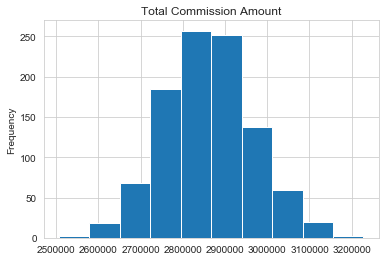

In [66]:
results_df['Commission_Amount'].plot(kind='hist', title="Total Commission Amount")

In [ ]:
#https://www.mikulskibartosz.name/monte-carlo-simulation-in-python/
#https://github.com/chris1610/pbpython/blob/master/notebooks/Monte_Carlo_Simulation.ipynb